In [4]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups()
print(news_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


[480 584 591 590 578 593 585 594 598 597 600 595 591 594 593 599 546 564
 465 377]


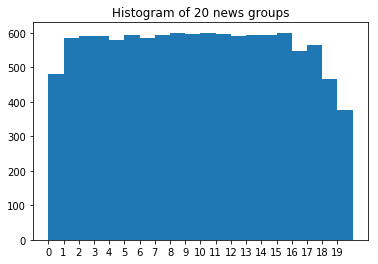

In [7]:
import numpy as np
import matplotlib.pyplot as plt

types = news_data.target
plt.hist(types, bins=np.arange(21))
print(np.histogram(types, bins = np.arange(21))[0])
plt.title("Histogram of 20 news groups")
plt.xticks(np.arange(20))
plt.show()


In [8]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
import nltk
from nltk import pos_tag

from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')

print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of stop_words_en:\t\t %s" % len(stop_words_en))

from string import punctuation
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

wnl = nltk.wordnet.WordNetLemmatizer()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_string(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())


vectorizer = CountVectorizer(min_df=3, analyzer=stem_rmv_punc, stop_words = 'english')
X_train_vec = vectorizer.fit_transform(train_dataset.data)
X_test_vec= vectorizer.fit_transform(test_dataset.data)


X_train_vec.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AJ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
# of stop_words_skt:		 318
# of stop_words_en:		 179
# of punctuation:		 32
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AJ\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(4732, 16292)

In [7]:
# import nltk
# from nltk import pos_tag


# wnl = nltk.wordnet.WordNetLemmatizer()
# #nltk.download('punkt')
# #nltk.download('averaged_perceptron_tagger')
# #nltk.download('wordnet')

# def penn2morphy(penntag):
#     """ Converts Penn Treebank tags to WordNet. """
#     morphy_tag = {'NN':'n', 'JJ':'a',
#                   'VB':'v', 'RB':'r'}
#     try:
#         return morphy_tag[penntag[:2]]
#     except:
#         return 'n'

# def lemmatize_string(text):
#     # Text input is string, returns array of lowercased strings(words).
#     return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
#             for word, tag in pos_tag(nltk.word_tokenize(text))]

# train_lem=[]
# for doc in train_dataset.data:
#     train_lem.append(' '.join(lemmatize_string(doc)))
    
# test_lem=[]
# for doc in test_dataset.data:
#     test_lem.append(' '.join(lemmatize_string(doc)))

# train_lem[1]

#train

#a=lemmatize_sent_demo(train_dataset.data)
#X_train_vec = vectorizer.fit_transform(lemmatize_sent_demo(train_dataset.data))
#X_test_vec= vectorizer.fit_transform(lemmatize_sent_demo(test_dataset.data))

"from : jwh @ sei.cmu.edu ( john huber ) subject : re : nhl team captain organization : the software engineering institute line : 27 in article < 1993apr19.213015 @ iastate.edu > , njdevils @ iastate.edu ( cire y. trehguad ) write : | > anna matyas ( am2x+ @ andrew.cmu.edu ) write : | > : michael collingridge write : | > : > and , while we be on the subject , have a captain ever be trade , | > : > resign , or be strip of his title during the season ? any other | > : > team captain trivia would be appreciate . | > ; | > : be n't ron francis captain of the whaler when he be trade to | > : pittsburgh ? | > | > and rick tochett be the captain of the flyer when trade to the pen | > recently ... | > and of course , mike ramsey be ( at one time ) the captain in buffalo prior to be trade to pittsburgh . currently , the penguin have 3 former captain and 1 real captain ( lemieux ) play for them . they rotate the a 's during the season ( and even the c while mario be out ) . even troy loney have 

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vec)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_vec)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

#X_test_vec= vectorizer.fit_transform(test_dataset.data)

(4732, 16292)
(3150, 11218)


In [9]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(min_df=3, token_pattern=r'\b[^\d\W]+\b', stop_words = 'english')

# X_train_lem_tfidf_vec = tfidf_vectorizer.fit_transform(train_lem)
# X_test_lem_tfidf_vec = tfidf_vectorizer.fit_transform(test_lem)

# print(X_train_lem_tfidf_vec.shape)
# print(X_test_lem_tfidf_vec.shape)

(4732, 14301)
(3150, 10761)


In [17]:
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
X_train_NMF = model.fit_transform(X_train_tfidf)
X_test_NMF = model.fit_transform(X_test_tfidf)

print(X_train_NMF.shape)

(4732, 50)


In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_LSI = svd.fit_transform(X_train_tfidf)
X_test_LSI= svd.fit_transform(X_test_tfidf)
print(X_train_LSI.shape)

(4732, 50)


In [20]:
#print(train_dataset.target)
#print(test_dataset.target)


train_labels = np.array(train_dataset.target >3)
test_labels = np.array(test_dataset.target >3)
#print(train_dataset.filenames[:10])
print(train_labels[:10])
print(test_labels[:10])

[ True  True  True False False False False  True  True False]
[ True False False  True  True  True  True  True  True  True]


--------------------gamma =  0.001  ---------------------------
Confusion Matrix with gamma = 0.001
[[0. 1.]
 [0. 1.]]
Recall Score:
1.0
Precision Score:
0.5047619047619047
Accuracy:
0.5047619047619047
F1 Score:
0.6708860759493671
--------------------gamma =  1000.0  ---------------------------
Confusion Matrix with gamma = 1000.0
[[0.86410256 0.13589744]
 [0.4672956  0.5327044 ]]
Recall Score:
0.5327044025157233
Precision Score:
0.7998111425873465
Accuracy:
0.6968253968253968
F1 Score:
0.6394865987164968


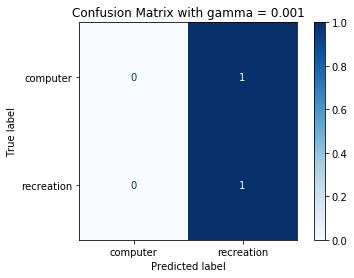

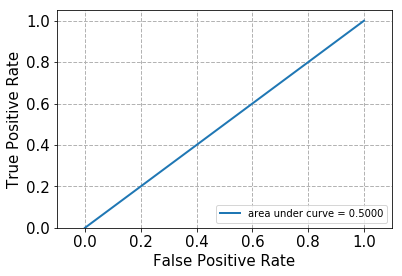

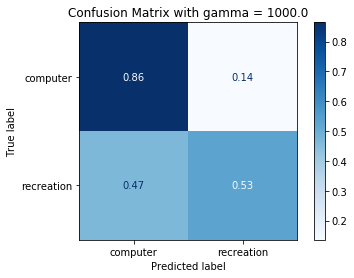

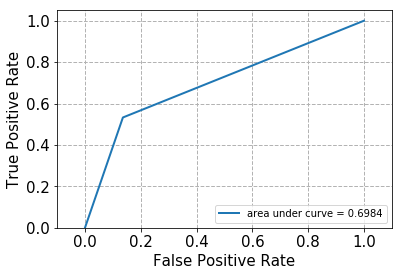

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

gammas = [1.0e-3, 1.0e3]        
for gamma_val in gammas:

    
    print('--------------------gamma = ' , gamma_val ,' ---------------------------')
    svm_classifier = SVC(kernel='linear', C=gamma_val)
    svm_classifier.fit(X_train_LSI, train_labels)
    #print(classifier.score(X_test_LSI,test_labels))


    normalize = 'true'
    class_names=['computer','recreation']
    title='Confusion Matrix with gamma = ' + str(gamma_val)
    disp = plot_confusion_matrix(svm_classifier, X_test_LSI, test_labels,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    fpr, tpr, _ = roc_curve(test_labels, svm_classifier.predict(X_test_LSI))
    plot_roc(fpr,tpr)



    print("Recall Score:")
    print(recall_score(test_labels, svm_classifier.predict(X_test_LSI)))
    print("Precision Score:")
    print(precision_score(test_labels, svm_classifier.predict(X_test_LSI)))
    print("Accuracy:")
    print(accuracy_score(test_labels, svm_classifier.predict(X_test_LSI)))
    print("F1 Score:")
    print(f1_score(test_labels, svm_classifier.predict(X_test_LSI)))
    del svm_classifier

-------------- gamma =  0.001  ------------
Confusion Matrix with gamma = 0.001
[[0. 1.]
 [0. 1.]]
Mean Recall Score:
0.8
Mean Precision Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4001408450704226
Mean Accuracy Score:
0.495774647887324
Mean F1 Score:
0.33138043401911016
-------------- gamma =  0.01  ------------
Confusion Matrix with gamma = 0.01
[[0.01025641 0.98974359]
 [0.         1.        ]]
Mean Recall Score:
0.8
Mean Precision Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.40028089608829864
Mean Accuracy Score:
0.496056338028169
Mean F1 Score:
0.33200271627989686
-------------- gamma =  0.1  ------------
Confusion Matrix with gamma = 0.1
[[0.88333333 0.11666667]
 [0.35283019 0.64716981]]
Mean Recall Score:
0.9783037405775978
Mean Precision Score:
0.9669994118666466
Mean Accuracy Score:
0.9722535211267607
Mean F1 Score:
0.9722310098296283
-------------- gamma =  1.0  ------------
Confusion Matrix with gamma = 1.0
[[0.89551282 0.10448718]
 [0.36981132 0.63018868]]
Mean Recall Score:
0.9773661026569448
Mean Precision Score:
0.9724634807010843
Mean Accuracy Score:
0.9746478873239438
Mean F1 Score:
0.9746193528214239
-------------- gamma =  10.0  ------------
Confusion Matrix with gamma = 10.0
[[0.89358974 0.10641026]
 [0.41886792 0.58113208]]
Mean Recall Score:
0.9754811746525236
Mean Precision Score:
0.9767991862743302
Mean Accuracy Score:
0.9759154929577465
Mean F1 Score:
0.9758905604554332
-------------- gamma =  100.0  ------------
Confusion Matrix wit

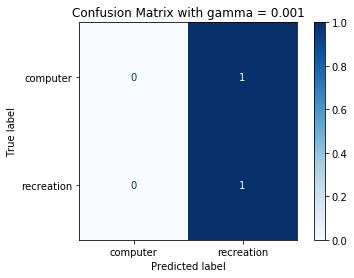

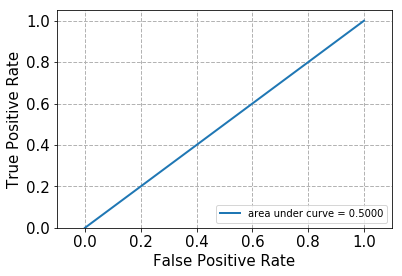

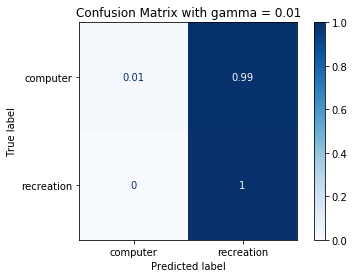

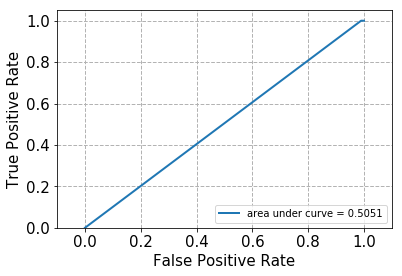

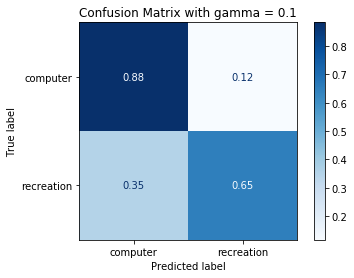

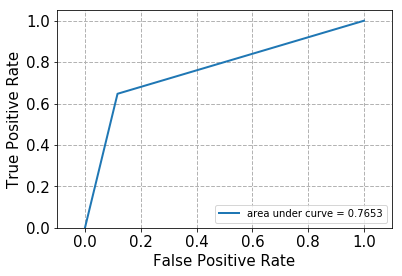

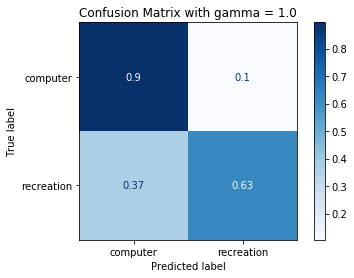

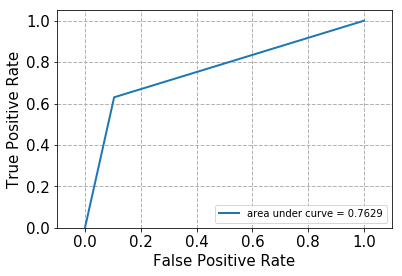

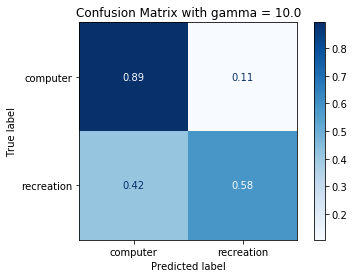

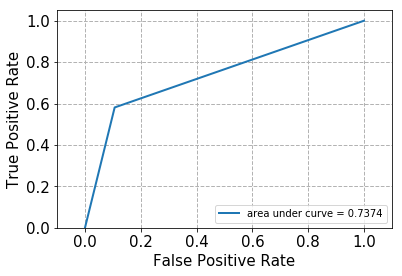

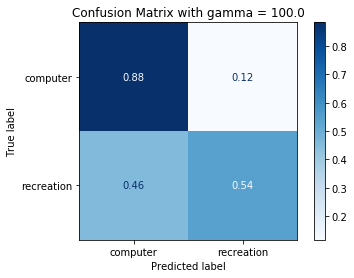

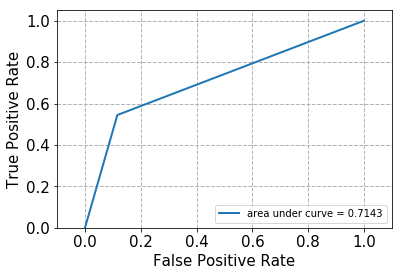

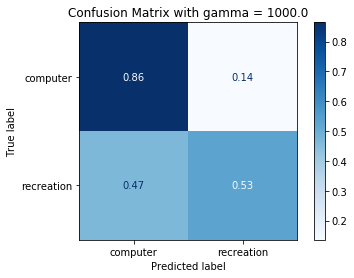

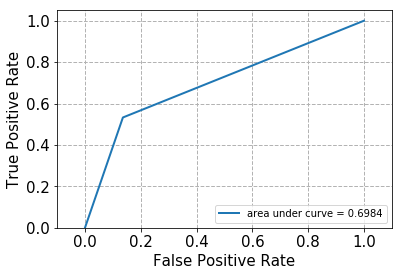

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
# from sklearn import metrics
from sklearn.svm import SVC

powers =np.arange(-3,4)

for power in powers:
    current_gamma = 10.0**power
    print('-------------- gamma = ',current_gamma,' ------------')
    
    clf=SVC(kernel='linear', C = current_gamma)
    clf.fit(X_train_LSI, train_labels)
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

    
    
    
    normalize = 'true'
    class_names=['computer','recreation']
    title='Confusion Matrix with gamma = ' + str(current_gamma)
    disp = plot_confusion_matrix(clf, X_test_LSI, test_labels,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    fpr, tpr, _ = roc_curve(test_labels, clf.predict(X_test_LSI))
    plot_roc(fpr,tpr)


    print("Mean Recall Score:")
    rec_scores = cross_val_score(clf, X_train_LSI, train_labels, cv=cv, scoring='recall')
    print(np.mean(rec_scores))
    print("Mean Precision Score:")
    prec_scores = cross_val_score(clf, X_train_LSI, train_labels, cv=cv, scoring='precision')
    print(np.mean(prec_scores))
    print("Mean Accuracy Score:")
    acc_scores = cross_val_score(clf, X_train_LSI, train_labels, cv=cv, scoring='accuracy')
    print(np.mean(acc_scores))
    print("Mean F1 Score:")
    f1_scores = cross_val_score(clf, X_train_LSI, train_labels, cv=cv, scoring='f1_macro')
    print(np.mean(f1_scores))

Confusion Matrix with no regularization
[[0.87820513 0.12179487]
 [0.4408805  0.5591195 ]]
Mean Recall Score:
0.9765466335098033
Mean Precision Score:
0.9743479262996333
Mean Accuracy Score:
0.9752112676056338
Mean F1 Score:
0.9751841505003614
test acc 0.7171428571428572


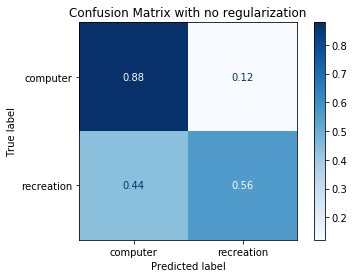

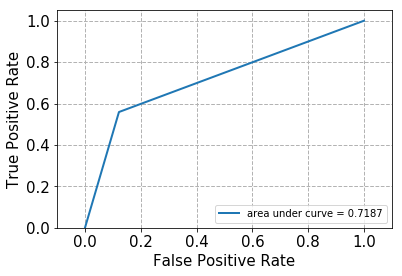

In [25]:
from sklearn.linear_model import LogisticRegression as lr

lr_classifier = lr(penalty='none',max_iter=1000).fit(X_train_LSI, train_labels)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['computer','recreation']
title='Confusion Matrix with no regularization'
disp = plot_confusion_matrix(lr_classifier, X_test_LSI, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

fpr, tpr, _ = roc_curve(test_labels, lr_classifier.predict(X_test_LSI))
plot_roc(fpr,tpr)



print("Mean Recall Score:")
rec_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='recall')
print(np.mean(rec_scores))
print("Mean Precision Score:")
prec_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='precision')
print(np.mean(prec_scores))
print("Mean Accuracy Score:")
acc_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='accuracy')
print(np.mean(acc_scores))
print("Mean F1 Score:")
f1_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='f1_macro')
print(np.mean(f1_scores))

print('test acc', lr_classifier.score(X_test_LSI,test_labels))

In [27]:
powers = np.arange(-3,4)
for power in powers:
    C_val = 10.0**(power)
    print('-------------L2 regularization with C = ',C_val,' ----------------')
    lr_classifier = lr(penalty='l2',max_iter=1000, random_state=0, C = C_val).fit(X_train_LSI, train_labels)

    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


    print("Mean Recall Score:")
    rec_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='recall')
    print(np.mean(rec_scores))
    print("Mean Precision Score:")
    prec_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='precision')
    print(np.mean(prec_scores))
    print("Mean Accuracy Score:")
    acc_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='accuracy')
    print(np.mean(acc_scores))
    print("Mean F1 Score:")
    f1_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='f1_macro')
    print(np.mean(f1_scores))

-------------L2 regularization with C =  0.001  ----------------
Mean Recall Score:
0.8450443574257207
Mean Precision Score:
0.6870350698540264
Mean Accuracy Score:
0.6150704225352113
Mean F1 Score:
0.5121469880963264
-------------L2 regularization with C =  0.01  ----------------
Mean Recall Score:
0.9826013984507664
Mean Precision Score:
0.876296781217168
Mean Accuracy Score:
0.9090140845070422
Mean F1 Score:
0.9062966858625767
-------------L2 regularization with C =  0.1  ----------------
Mean Recall Score:
0.9777863512549629
Mean Precision Score:
0.964330001147994
Mean Accuracy Score:
0.9705633802816902
Mean F1 Score:
0.9705436661411513
-------------L2 regularization with C =  1.0  ----------------
Mean Recall Score:
0.976873640060122
Mean Precision Score:
0.9734381514334174
Mean Accuracy Score:
0.9749295774647889
Mean F1 Score:
0.9749076142987338
-------------L2 regularization with C =  10.0  ----------------
Mean Recall Score:
0.9768708480194895
Mean Precision Score:
0.9757158942

In [29]:
powers = np.arange(-3,4)
for power in powers:
    C_val = 10.0**(power)
    print('-------------L1 regularization with C = ',C_val,' ----------------')
    lr_classifier = lr(penalty='l1',max_iter=1000, random_state=0, C = C_val, solver='liblinear').fit(X_train_LSI, train_labels)

    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


    print("Mean Recall Score:")
    rec_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='recall')
    print(np.mean(rec_scores))
    print("Mean Precision Score:")
    prec_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='precision')
    print(np.mean(prec_scores))
    print("Mean Accuracy Score:")
    acc_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='accuracy')
    print(np.mean(acc_scores))
    print("Mean F1 Score:")
    f1_scores = cross_val_score(lr_classifier, X_train_LSI, train_labels, cv=cv, scoring='f1_macro')
    print(np.mean(f1_scores))

-------------L1 regularization with C =  0.001  ----------------
Mean Recall Score:
0.0
Mean Precision Score:
0.0
Mean Accuracy Score:
0.4954929577464789

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin


Mean F1 Score:
0.33125573009199255
-------------L1 regularization with C =  0.01  ----------------
Mean Recall Score:
0.0
Mean Precision Score:


C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defin

0.0
Mean Accuracy Score:
0.4954929577464789
Mean F1 Score:
0.33125573009199255
-------------L1 regularization with C =  0.1  ----------------
Mean Recall Score:
0.9729393141390528
Mean Precision Score:
0.9578885870872279
Mean Accuracy Score:
0.9647887323943662
Mean F1 Score:
0.9647496252810568
-------------L1 regularization with C =  1.0  ----------------
Mean Recall Score:
0.9735203658840217
Mean Precision Score:
0.972652142192324
Mean Accuracy Score:
0.9728169014084507
Mean F1 Score:
0.9727894519138097
-------------L1 regularization with C =  10.0  ----------------
Mean Recall Score:
0.976841226356971
Mean Precision Score:
0.9756884535521667
Mean Accuracy Score:
0.976056338028169
Mean F1 Score:
0.9760303516344745
-------------L1 regularization with C =  100.0  ----------------
Mean Recall Score:
0.9760001854223714
Mean Precision Score:
0.9743374464732989
Mean Accuracy Score:
0.9749295774647887
Mean F1 Score:
0.9749025507283673
-------------L1 regularization with C =  1000.0  --------

Confusion Matrix with no regularization
[[0.82179487 0.17820513]
 [0.39559748 0.60440252]]
Mean Recall Score:
0.9648505822458532
Mean Precision Score:
0.8638576437139982
Mean Accuracy Score:
0.9056338028169015
Mean F1 Score:
0.9051355525340343


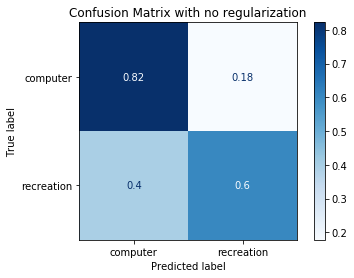

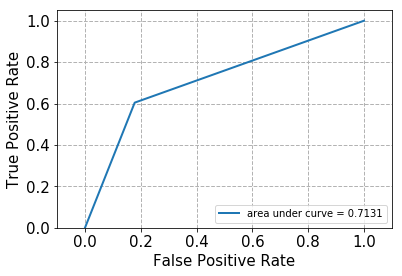

In [30]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB().fit(X_train_LSI, train_labels)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['computer','recreation']
title='Confusion Matrix with no regularization'
disp = plot_confusion_matrix(gauss, X_test_LSI, test_labels,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

fpr, tpr, _ = roc_curve(test_labels, gauss.predict(X_test_LSI))
plot_roc(fpr,tpr)


print("Mean Recall Score:")
rec_scores = cross_val_score(gauss, X_train_LSI, train_labels, cv=cv, scoring='recall')
print(np.mean(rec_scores))
print("Mean Precision Score:")
prec_scores = cross_val_score(gauss, X_train_LSI, train_labels, cv=cv, scoring='precision')
print(np.mean(prec_scores))
print("Mean Accuracy Score:")
acc_scores = cross_val_score(gauss, X_train_LSI, train_labels, cv=cv, scoring='accuracy')
print(np.mean(acc_scores))
print("Mean F1 Score:")
f1_scores = cross_val_score(gauss, X_train_LSI, train_labels, cv=cv, scoring='f1_macro')
print(np.mean(f1_scores))



In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=0)),
    ('clf', GaussianNB()),
],
memory=memory
)


N_FEATURES_OPTIONS = [10, 50]
C_OPTIONS = [0.1, 1, 10]
# REG_OPTIONS = ['l1', 'l2']
# REG_STRENGTH_OPTIONS = [0.1, 1, 10]

from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

param_grid = [
    {
        'vect' : [CountVectorizer()],
        'vect__min_df' : [3, 5],
        'vect__stop_words' : ['english'],
        'vect__analyzer' : ['word',stem_rmv_punc],
        'reduce_dim' : [TruncatedSVD(), NMF()],
        'reduce_dim__n_components' : [50],
        'clf' : [LinearSVC()],
        'clf__C' : [100]
    },
    {
        'vect' : [CountVectorizer()],
        'vect__min_df' : [3, 5],
        'vect__stop_words' : ['english'],
        'vect__analyzer' : ['word',stem_rmv_punc],
        'reduce_dim' : [TruncatedSVD(), NMF()],
        'reduce_dim__n_components' : [50],
        'clf': [LogisticRegression()],
        'clf__penalty' : ['l1','l2'],
        'clf__C' : [100],
        'clf__solver': ['liblinear']
    },
    {
        'vect' : [CountVectorizer()],
        'vect__min_df' : [3, 5],
        'vect__stop_words' : ['english'],
        'vect__analyzer': ['word',stem_rmv_punc],
        'reduce_dim' : [TruncatedSVD(), NMF()],
        'reduce_dim__n_components' : [50],
        'clf' : [GaussianNB()]
    },
    
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_dataset.data, train_dataset.target)
rmtree(cachedir)

C:\Users\AJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\AJ\\AppData\\Local\\Temp\\tmpn67xazdw'", use "location='C:\\Users\\AJ\\AppData\\Local\\Temp\\tmpn67xazdw'" instead.
  # Remove the CWD from sys.path while we load stuff.


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: domet@ucbeh.san.uc.edu\n'
  'Subject: Windows NT, HELP! PLEASE HELP!\n'
  'Distribution: world\n'
  'Organization: Univ of Cincinnati Academic IT Services\n'
  'Lines: 26\n'
  '\n'
  'WINDOWS NT\n'
  '\n'
  '\n'
  'I need some information on the new Windows NT.\n'
  'Anything you have would be appreciated. I know nothing about it.\n'
  '(Well, except that it exists.)\n'
  'Some questions... \n'
  '\n'
  'Memor

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 2.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17541 sparse matrix of type '<class 'numpy.int64'>'
	with 328437 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x17541 sparse matrix of type '<class 'numpy.float64'>'
	with 328437 stored elements in Compressed Sparse Row format>, 
array([1, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x17298 sparse matrix of type '<class 'numpy.int64'>'
	with 325124 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x17298 sparse matrix of type '<class 'numpy.float64'>'
	with 325124 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 2.05s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17612 sparse matrix of type '<class 'numpy.int64'>'
	with 328272 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x17612 sparse matrix of type '<class 'numpy.float64'>'
	with 328272 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17284 sparse matrix of type '<class 'numpy.int64'>'
	with 326872 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x17284 sparse matrix of type '<class 'numpy.float64'>'
	with 326872 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x17453 sparse matrix of type '<class 'numpy.int64'>'
	with 329322 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x17453 sparse matrix of type '<class 'numpy.float64'>'
	with 329322 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: domet@ucbeh.san.uc.edu\n'
  'Subject: Windows NT, HELP! PLEASE HELP!\n'
  'Distribution: world\n'
  'Organization: Univ of Cincinnati Academic IT Services\n'
  'Lines: 26\n'
  '\n'
  'WINDOWS NT\n'
  '\n'
  '\n'
  'I need some information on the new Windows NT.\n'
  'Anything you have would be appreciated. I know nothing about it.\n'
  '(Well, except that it exists.)\n'
  'Some questions... \n'
  '\n'
  'Memor

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.65s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x11006 sparse matrix of type '<class 'numpy.int64'>'
	with 306359 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x11006 sparse matrix of type '<class 'numpy.float64'>'
	with 306359 stored elements in Compressed Sparse Row format>, 
array([1, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x10960 sparse matrix of type '<class 'numpy.int64'>'
	with 303735 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x10960 sparse matrix of type '<class 'numpy.float64'>'
	with 303735 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.50s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11023 sparse matrix of type '<class 'numpy.int64'>'
	with 306093 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x11023 sparse matrix of type '<class 'numpy.float64'>'
	with 306093 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.36s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11040 sparse matrix of type '<class 'numpy.int64'>'
	with 305711 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x11040 sparse matrix of type '<class 'numpy.float64'>'
	with 305711 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb yet.\n"
  '|> \n'
  '|> Gerald Perry of the Cardinals p

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


________________________________________________fit_transform_one - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x11122 sparse matrix of type '<class 'numpy.int64'>'
	with 307991 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x11122 sparse matrix of type '<class 'numpy.float64'>'
	with 307991 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: domet@ucbeh.san.uc.edu\n'
  'Subject: Windows NT, HELP! PLEASE HELP!\n'
  'Distribution: world\n'
  'Organization: Univ of Cincinnati Academic IT Services\n'
  'Lines: 26\n'
  '\n'
  'WINDOWS NT\n'
  '\n'
  '\n'
  'I need some information on the new Windows NT.\n'
  'Anything you have would be appreciated. I know nothing about it.\n'
  '(Well, except that

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 55.2s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x14141 sparse matrix of type '<class 'numpy.int64'>'
	with 287761 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x14141 sparse matrix of type '<class 'numpy.float64'>'
	with 287761 stored elements in Compressed Sparse Row format>, 
array([1, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 49.8s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x13798 sparse matrix of type '<class 'numpy.int64'>'
	with 284238 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x13798 sparse matrix of type '<class 'numpy.float64'>'
	with 284238 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.6s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x14209 sparse matrix of type '<class 'numpy.int64'>'
	with 287694 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x14209 sparse matrix of type '<class 'numpy.float64'>'
	with 287694 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.4s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x13800 sparse matrix of type '<class 'numpy.int64'>'
	with 286041 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x13800 sparse matrix of type '<class 'numpy.float64'>'
	with 286041 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.83s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 49.6s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x13993 sparse matrix of type '<class 'numpy.int64'>'
	with 288679 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x13993 sparse matrix of type '<class 'numpy.float64'>'
	with 288679 stored elements in Compressed Sparse Row format>, 
array([6, ..

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: domet@ucbeh.san.uc.edu\n'
  'Subject: Windows NT, HELP! PLEASE HELP!\n'
  'Distribution: world\n'
  'Organization: Univ of Cincinnati Academic IT Services\n'
  'Lines: 26\n'
  '\n'
  'WINDOWS NT\n'
  '\n'
  '\n'
  'I need some information on the new Windows NT.\n'
  'Anything you have would be appreciated. I know nothing about it.\n'
  '(Well, except that

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 51.0s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8859 sparse matrix of type '<class 'numpy.int64'>'
	with 269955 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x8859 sparse matrix of type '<class 'numpy.float64'>'
	with 269955 stored elements in Compressed Sparse Row format>, 
array([1, ...,

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 55.4s, 0.9min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3785x8757 sparse matrix of type '<class 'numpy.int64'>'
	with 267206 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3785x8757 sparse matrix of type '<class 'numpy.float64'>'
	with 267206 stored elements in Compressed Sparse Row format>, 
array([6, ...,

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.2s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x8854 sparse matrix of type '<class 'numpy.int64'>'
	with 269689 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x8854 sparse matrix of type '<class 'numpy.float64'>'
	with 269689 stored elements in Compressed Sparse Row format>, 
array([6, ...,

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 50.5s, 0.8min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x8856 sparse matrix of type '<class 'numpy.int64'>'
	with 269277 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x8856 sparse matrix of type '<class 'numpy.float64'>'
	with 269277 stored elements in Compressed Sparse Row format>, 
array([6, ...,

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(analyzer=<function stem_rmv_punc at 0x000001F3E92C0620>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None), 
[ 'From: sac@asdi.saic.com (Steve A. Conroy x6172)\n'
  'Subject: Re: Darrrrrrrrryl\n'
  'Organization: SAIC\n'
  'Lines: 33\n'
  '\n'
  'In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) '
  'writes:\n'
  '|> \n'
  '|> \n'
  '|> The media is beating the incident at Dodger Stadium on Wednesday to\n'
  "|> death, but I haven't seen anything in rsb

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.33s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 59.3s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <3786x8956 sparse matrix of type '<class 'numpy.int64'>'
	with 271652 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<3786x8956 sparse matrix of type '<class 'numpy.float64'>'
	with 271652 stored elements in Compressed Sparse Row format>, 
array([6, ...,

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\84b6e47a1065c6c70f85abd4debeb962
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\14d2293437a83ecaec9bdfdc3900fcc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x17541 sparse matrix of type '<class 'numpy.float64'>'
	with 328437 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e9d816ed8793ce1cd805cbfeea78eb1b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\22890eb16790d420c36ca083359a8db5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x17298 sparse matrix of type '<class 'numpy.float64'>'
	with 325124 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a3cc61757676cf740f09cb022757aeba
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\22e18f4e152ac356e5ddcc02e6a46ba1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x17612 sparse matrix of type '<class 'numpy.float64'>'
	with 328272 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\1d27f35211c96acd9bea0837acd32990
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\238046abb8ceb493fe41fe2d5356c1b9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x17284 sparse matrix of type '<class 'numpy.float64'>'
	with 326872 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\016a0f22b159999620d4cc6dbcb8c44b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\55931e68b30e902b0e221cc8e5dd1239
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x17453 sparse matrix of type '<class 'numpy.float64'>'
	with 329322 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\88433058f986a5729036e6cec5e4abef
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\ad5aef6d5c9ef0d697e625db5c9c2a98
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x11006 sparse matrix of type '<class 'numpy.float64'>'
	with 306359 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\cba44f3231ddd4ec18216cf24924204d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\0eecf13f46a7425dc315a4e695d5cbad
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x10960 sparse matrix of type '<class 'numpy.float64'>'
	with 303735 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\af49aa3556b85a1d248216cb29076ac7
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\2f50f2d13ce4efda07cce57940bd1f97
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x11023 sparse matrix of type '<class 'numpy.float64'>'
	with 306093 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\ebf955d8066671f1e7c9ab073d0b6977
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\f7f2a1dee99aa436195cbd1b2c790df6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x11040 sparse matrix of type '<class 'numpy.float64'>'
	with 305711 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\7da84911ef34f52175395ea82cb4acfc
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\06d0af376b8f5d44ef0aac6f0c95184f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x11122 sparse matrix of type '<class 'numpy.float64'>'
	with 307991 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\4eaf030d5ccaa3a6dd7a6d7179aaed59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\2660d3a4b642823c257ca390f7583077
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x14141 sparse matrix of type '<class 'numpy.float64'>'
	with 287761 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\8c510d18837bd3ee3aadd831db115d11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\ca042edb8cddd13b0a37ed4bfcb43adc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x13798 sparse matrix of type '<class 'numpy.float64'>'
	with 284238 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\559488486a31972404d9eddc2d830193
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\c06a2b12f2d70e0fc2e3aed71c405c4a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x14209 sparse matrix of type '<class 'numpy.float64'>'
	with 287694 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\17ad1eb4f3b424dd89a76df3bf0cfca9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\090aca3a32e131e7dd3e3c6192091e79
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x13800 sparse matrix of type '<class 'numpy.float64'>'
	with 286041 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\90913b40a10d85c2ef714a5a94646bd9
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\f30a350e8d18669281c4d387de7a4578
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x13993 sparse matrix of type '<class 'numpy.float64'>'
	with 288679 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a3220dcc5296b26a64101e6080509289
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.2s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e3e73b90f27b7c8d21a80a2eb6fe9943
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x8859 sparse matrix of type '<class 'numpy.float64'>'
	with 269955 stored elements in Compressed Sparse Row format>, 
array([1, ..., 2], dtype=int64)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\9ab8fbe5e23c83a700f2fc93371d3ce5
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e4a6a31360be7cf321b9a12e902e2795
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3785x8757 sparse matrix of type '<class 'numpy.float64'>'
	with 267206 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\40185d465c65648a94a00950e97e9248
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a84f001285c235ee9ff0b8e6bca2595f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x8854 sparse matrix of type '<class 'numpy.float64'>'
	with 269689 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\69d44ccc89c0e5293a43cb9f85abfa32
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a2eb595ce86f82a5b2072ab2c5544f33
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x8856 sparse matrix of type '<class 'numpy.float64'>'
	with 269277 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\5db855a11bfe752f425617e929d65e2a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\734737f9534223818a30aa3576948920
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), 
<3786x8956 sparse matrix of type '<class 'numpy.float64'>'
	with 271652 stored elements in Compressed Sparse Row format>, 
array([6, ..., 6], dtype=int64)

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\84b6e47a1065c6c70f85abd4debeb962
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\14d2293437a83ecaec9bdfdc3900fcc5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\35e8f34a65d5f1b15046004f57864a67
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e9d816ed8793ce1cd805cbfeea78eb1b
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\8c510d18837bd3ee3aadd831db115d11
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\ca042edb8cddd13b0a37ed4bfcb43adc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\0ebb20d2829bf092b6bf7bb05aa2424f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\559488486a31972404d9eddc2d830193
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a3cc61757676cf740f09cb022757aeba
___________________________________fit_transform_one cache loaded - 0.4s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\22e18f4e152ac356e5ddcc02e6a46ba1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.5s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\f2d480f3964d3e9d7f2a1637bc5324ac
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\1d27f35211c96acd9bea0837acd32990
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\17ad1eb4f3b424dd89a76df3bf0cfca9
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\090aca3a32e131e7dd3e3c6192091e79
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\874377a485b7aa2cdde4c17bdc7bcb16
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\90913b40a10d85c2ef714a5a94646bd9
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\016a0f22b159999620d4cc6dbcb8c44b
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\55931e68b30e902b0e221cc8e5dd1239
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\489b7b29ada4465878942f4bf4a6ce73
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\88433058f986a5729036e6cec5e4abef
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a3220dcc5296b26a64101e6080509289
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e3e73b90f27b7c8d21a80a2eb6fe9943
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\bc4e2504e5913a87b07849a5d2439d87
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\9ab8fbe5e23c83a700f2fc93371d3ce5
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\cba44f3231ddd4ec18216cf24924204d
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\0eecf13f46a7425dc315a4e695d5cbad
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e1c972cee2f0b549c960a9e3784cebaf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\af49aa3556b85a1d248216cb29076ac7
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\40185d465c65648a94a00950e97e9248
___________________________________fit_transform_one cache loaded - 0.3s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\a84f001285c235ee9ff0b8e6bca2595f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.4s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\3ea651a20d2db521137526d6c2af030f
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\69d44ccc89c0e5293a43cb9f85abfa32
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\ebf955d8066671f1e7c9ab073d0b6977
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\f7f2a1dee99aa436195cbd1b2c790df6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\50eca53426b8a20bd03c6eaebfb60990
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\7da84911ef34f52175395ea82cb4acfc
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\5db855a11bfe752f425617e929d65e2a
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\734737f9534223818a30aa3576948920
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\e247cff4cf6abd9c438798d23a78a2b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\84b6e47a1065c6c70f85abd4debeb962
___________________________________fit_transform_

[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\4eaf030d5ccaa3a6dd7a6d7179aaed59
___________________________________fit_transform_one cache loaded - 0.2s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\2660d3a4b642823c257ca390f7583077
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.3s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\774ab32d5940bc0eaf8228f13c6628bf
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\AJ\AppData\Local\Temp\tmpn67xazdw\joblib\sklearn\pipeline\_fit_transform_one\8c510d18837bd3ee3aadd831db115d11
___________________________________fit_transform_

C:\Users\AJ\Anaconda3\lib\site-packages\sklearn\pipeline.py:315: UserWarning: Persisting input arguments took 1.87s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])


_______________________________________________fit_transform_one - 62.3s, 1.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True), <4732x16292 sparse matrix of type '<class 'numpy.int64'>'
	with 363811 stored elements in Compressed Sparse Row format>, 
array([6, ..., 2], dtype=int64), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
             random_state=None, tol=0.0), 
<4732x16292 sparse matrix of type '<class 'numpy.float64'>'
	with 363811 stored elements in Compressed Sparse Row format>, 
array([6, ..

In [35]:
import pandas as pd

pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_clf__C,param_reduce_dim,param_reduce_dim__n_components,param_vect,param_vect__analyzer,...,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.723671,0.438699,0.213428,0.034059,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"TruncatedSVD(algorithm='randomized', n_compone...",50,"CountVectorizer(analyzer='word', binary=False,...",word,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.860612,0.852165,0.839323,0.855180,0.868922,0.855240,0.009786,8
1,6.152705,0.682467,0.204875,0.035541,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"TruncatedSVD(algorithm='randomized', n_compone...",50,"CountVectorizer(analyzer='word', binary=False,...",word,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.865892,0.857445,0.842495,0.845666,0.859408,0.854181,0.008766,11
2,54.988352,2.030444,12.405853,0.490358,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"TruncatedSVD(algorithm='randomized', n_compone...",50,"CountVectorizer(analyzer='word', binary=False,...",<function stem_rmv_punc at 0x000001F3E92C0620>,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.869060,0.851109,0.846723,0.852008,0.858351,0.855450,0.007752,6
3,56.996984,3.653906,13.506020,1.655421,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"TruncatedSVD(algorithm='randomized', n_compone...",50,"CountVectorizer(analyzer='word', binary=False,...",<function stem_rmv_punc at 0x000001F3E92C0620>,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.870116,0.852165,0.855180,0.843552,0.860465,0.856296,0.008822,5
4,24.877578,5.692347,0.295479,0.010610,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"NMF(alpha=0.0, beta_loss='frobenius', init=Non...",50,"CountVectorizer(analyzer='word', binary=False,...",word,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.825766,0.797254,0.786469,0.820296,0.802326,0.806422,0.014599,21
5,15.370783,3.889545,0.268800,0.008716,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"NMF(alpha=0.0, beta_loss='frobenius', init=Non...",50,"CountVectorizer(analyzer='word', binary=False,...",word,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.820486,0.803590,0.809725,0.797040,0.808668,0.807902,0.007731,19
6,23.358451,2.360320,14.007100,0.531164,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"NMF(alpha=0.0, beta_loss='frobenius', init=Non...",50,"CountVectorizer(analyzer='word', binary=False,...",<function stem_rmv_punc at 0x000001F3E92C0620>,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.834213,0.810982,0.799154,0.824524,0.802326,0.814240,0.013303,17
7,13.664881,2.218832,14.272128,0.878808,"LinearSVC(C=1.0, class_weight=None, dual=True,...",100,"NMF(alpha=0.0, beta_loss='frobenius', init=Non...",50,"CountVectorizer(analyzer='word', binary=False,...",<function stem_rmv_punc at 0x000001F3E92C0620>,...,NaN,"{'clf': LinearSVC(C=1.0, class_weight=None, du...",0.826822,0.815206,0.795983,0.821353,0.824524,0.816778,0.011106,15
8,1.270272,0.031470,0.206861,0.006624,"LogisticRegression(C=100, class_weight=None, d...",100,"TruncatedSVD(algorithm='randomized', n_compone...",50,CountVectorizer(analyzer=<function stem_rmv_pu...,word,...,liblinear,"{'clf': LogisticRegression(C=100, class_weight...",0.860612,0.844773,0.843552,0.858351,0.868922,0.855242,0.009715,7
9,1.224795,0.046302,0.204214,0.005958,"LogisticRegression(C=100, class_weight=None, d...",100,"TruncatedSVD(algorithm='randomized', n_compone...",50,CountVectorizer(analyzer=<function stem_rmv_pu...,word,...,liblinear,"{'clf': LogisticRegression(C=100, class_weight...",0.868004,0.860612,0.835095,0.852008,0.859408,0.855026,0.011182,9


In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

gauss = GaussianNB().fit(X_train_LSI, train_dataset.target)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
title='Confusion Matrix with GaussianNB'
disp = plot_confusion_matrix(gauss, X_test_LSI, test_dataset.target,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,xticks_rotation='vertical',values_format='.1g')
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

#fpr, tpr, _ = roc_curve(train_dataset.target, gauss.predict(X_test_LSI))
#plot_roc(fpr,tpr)


print("Mean Recall Score:")

#rec_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='recall')
print(recall_score(test_dataset.target, gauss.predict(X_test_LSI),average='macro'))
print("Mean Precision Score:")
print(precision_score(test_dataset.target, gauss.predict(X_test_LSI),average='macro'))
#prec_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='precision')
#print(np.mean(prec_scores))
print("Mean Accuracy Score:")
print(accuracy_score(test_dataset.target, gauss.predict(X_test_LSI)))
#acc_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='accuracy')
#print(np.mean(acc_scores))
print("Mean F1 Score:")
print(f1_score(test_dataset.target, gauss.predict(X_test_LSI),average='macro'))
#f1_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='f1_macro')
#print(np.mean(f1_scores))


svm_classifier_ovr = SVC(kernel='linear',decision_function_shape='ovr', C=100).fit(X_train_LSI, train_dataset.target)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#     # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
title='Confusion Matrix with SVM OVR'
disp = plot_confusion_matrix(svm_classifier_ovr, X_test_LSI, test_dataset.target,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,xticks_rotation='vertical',values_format='.1g')
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

#fpr, tpr, _ = roc_curve(train_dataset.target, gauss.predict(X_test_LSI))
#plot_roc(fpr,tpr)


print("Mean Recall Score:")

#rec_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='recall')
print(recall_score(test_dataset.target, svm_classifier_ovr.predict(X_test_LSI),average='macro'))
print("Mean Precision Score:")
print(precision_score(test_dataset.target, svm_classifier_ovr.predict(X_test_LSI),average='macro'))
#prec_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='precision')
#print(np.mean(prec_scores))
print("Mean Accuracy Score:")
print(accuracy_score(test_dataset.target, svm_classifier_ovr.predict(X_test_LSI)))
#acc_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='accuracy')
#print(np.mean(acc_scores))
print("Mean F1 Score:")
print(f1_score(test_dataset.target, svm_classifier_ovr.predict(X_test_LSI),average='macro'))
#f1_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='f1_macro')
#print(np.mean(f1_scores))



svm_classifier_ovo = SVC(kernel='linear',decision_function_shape='ovo', C=100).fit(X_train_LSI, train_dataset.target)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#     # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

normalize = 'true'
class_names=['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
title='Confusion Matrix with SVM OVO'
disp = plot_confusion_matrix(svm_classifier_ovo, X_test_LSI, test_dataset.target,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,xticks_rotation='vertical',values_format='.1g')
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

#fpr, tpr, _ = roc_curve(train_dataset.target, gauss.predict(X_test_LSI))
#plot_roc(fpr,tpr)


print("Mean Recall Score:")

#rec_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='recall')
print(recall_score(test_dataset.target, svm_classifier_ovo.predict(X_test_LSI),average='macro'))
print("Mean Precision Score:")
print(precision_score(test_dataset.target, svm_classifier_ovo.predict(X_test_LSI),average='macro'))
#prec_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='precision')
#print(np.mean(prec_scores))
print("Mean Accuracy Score:")
print(accuracy_score(test_dataset.target, svm_classifier_ovo.predict(X_test_LSI)))
#acc_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='accuracy')
#print(np.mean(acc_scores))
print("Mean F1 Score:")
print(f1_score(test_dataset.target, svm_classifier_ovo.predict(X_test_LSI),average='macro'))
#f1_scores = cross_val_score(gauss, X_train_LSI, train_dataset.target, cv=cv, scoring='f1_macro')
#print(np.mean(f1_scores))


NameError: name 'X_train_LSI' is not defined